In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("mcdonalds.csv")
data.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
data.shape

(1453, 15)

In [5]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [6]:
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [7]:

pca = PCA()
MD_pca=pca.fit_transform(MD)
MD_p=pca.fit(MD)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [8]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T
# rot_matrix_df=pd.DataFrame(index=index,columns=index)

rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df
# load



Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


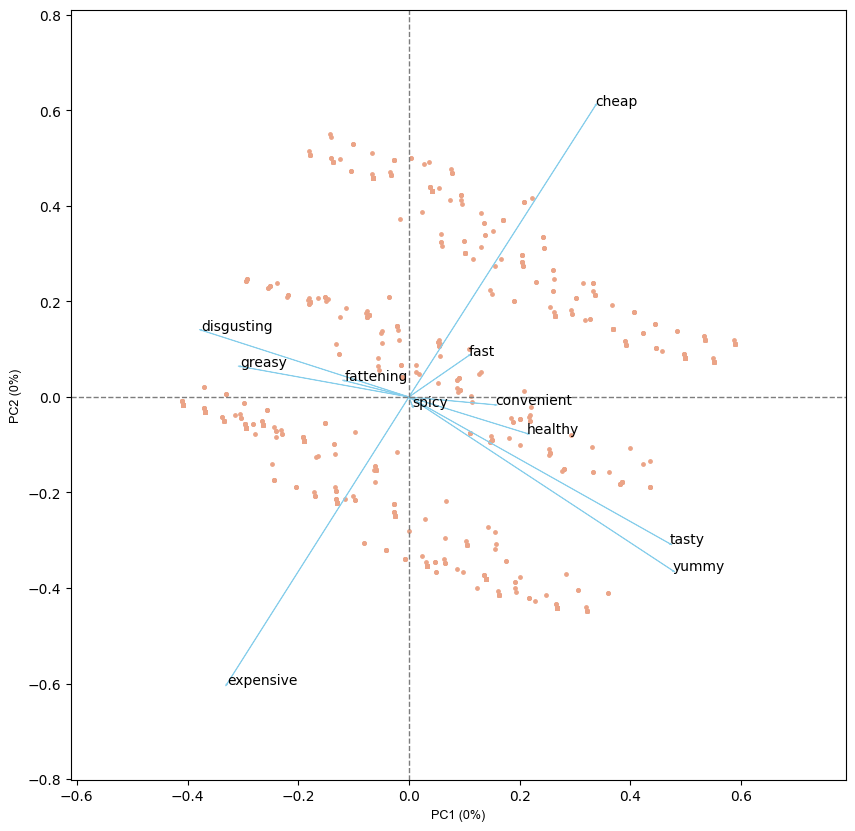

In [9]:

cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

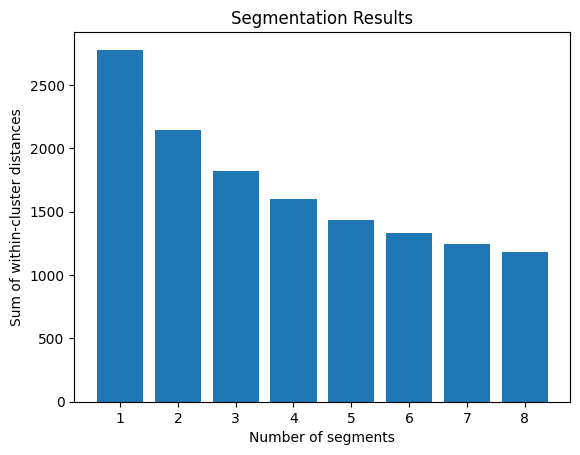

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


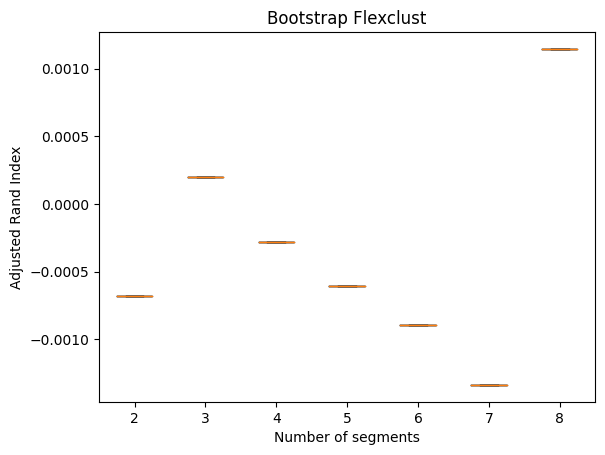

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)  # Set random seed for reproducibility

nboot = 100  # Number of bootstrap samples
nrep = 10  # Number of random initializations

# Perform bootstrap resampling
bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)  # Set random state for reproducibility
    bootstrap_samples.append(bootstrap_sample)

# Calculate adjusted Rand index for each number of segments
adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  # Set random state for reproducibility
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()


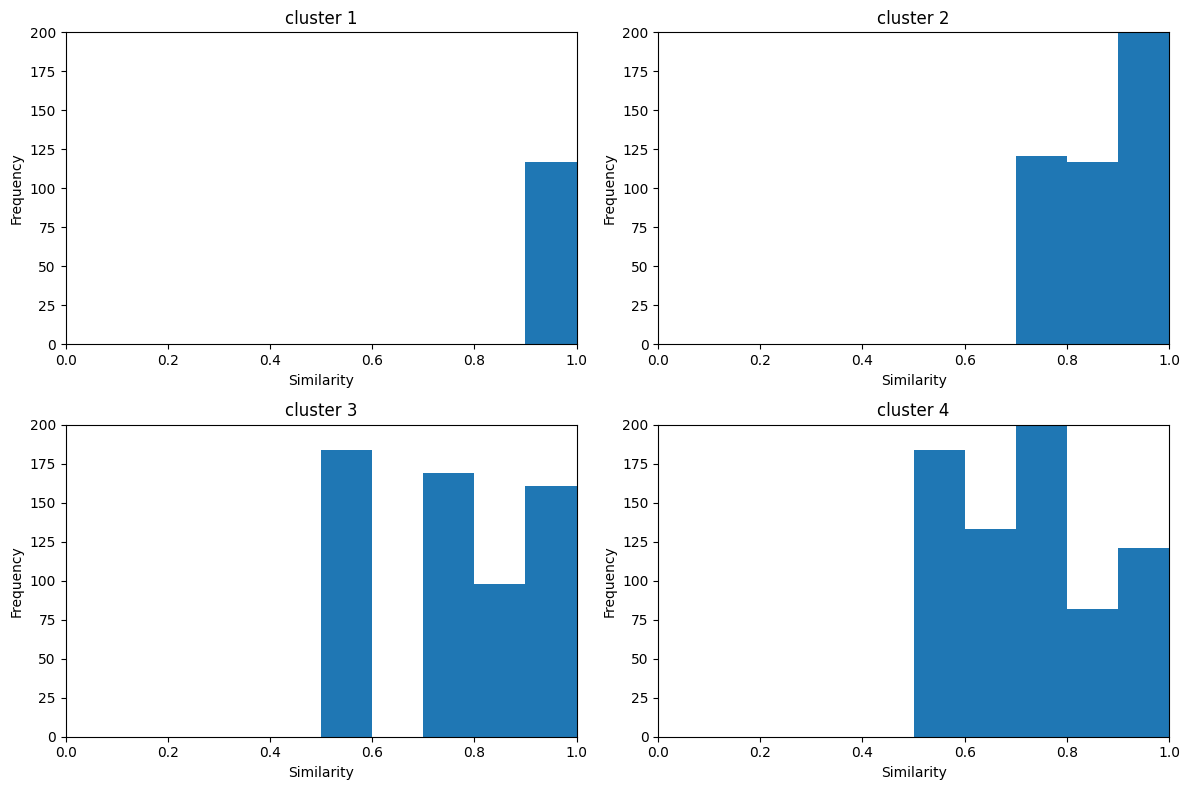

In [16]:
import matplotlib.pyplot as plt

# Define the common range and number of bins for all histograms
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Retrieve the labels and similarity values for the first four-segment solution
for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)

    # Determine the subplot coordinates
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plot the histogram in the corresponding subplot
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    # Set the same x-axis and y-axis limits for all subplots
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    # Set the same x-axis tick positions for all subplots
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


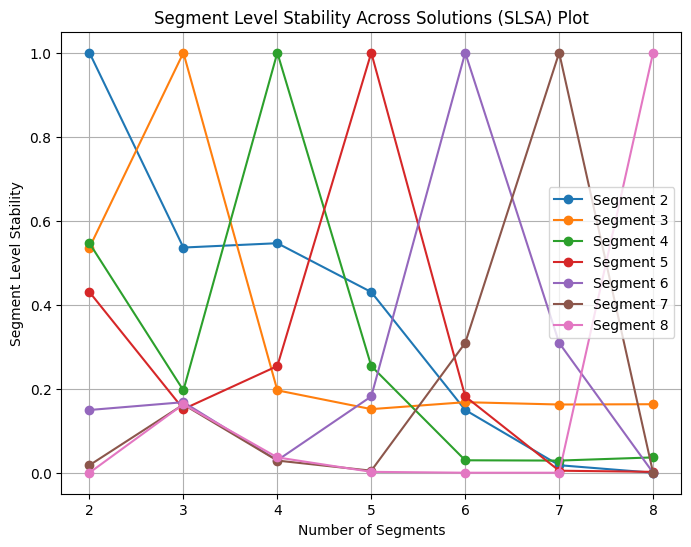

In [55]:
import numpy as np
import matplotlib.pyplot as plt

num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

# Plot the SLSA plot
plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


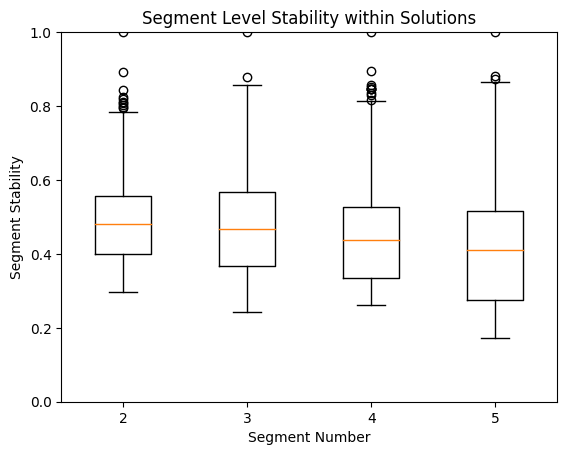

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve the labels and similarity values for each segment solution from 2 to 5
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

# Normalize the similarity values for each segment
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)  # Normalize by dividing by the maximum value
    segment_stability_values.append(normalized_similarities)

# Create a boxplot to visualize the stability values for each segment
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()


In [84]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import entropy
import pandas as pd

# Set the random seed
np.random.seed(1234)

# Define the number of segments (k_values) and other required variables
k_values = range(2, 9)
MD_m28 = []

# Fit the K-means model and retrieve the specified columns for each segment
for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    
    # Retrieve the desired information for the segment
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    
    # Calculate the ICL separately
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    # Append the segment information to the MD_m28 list
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Convert the MD_m28 list to a DataFrame
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the MD_m28 DataFrame
print(MD_m28)


C:\Users\Mohammed Roshan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Roshan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Roshan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohammed Roshan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


C:\Users\Mohammed Roshan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


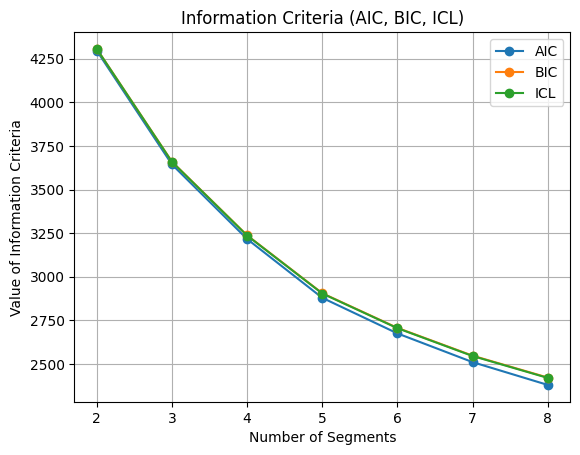

In [87]:
import matplotlib.pyplot as plt

# Extract the information criteria values from MD.m28
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

# Plot the information criteria values
plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [91]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd

# Perform K-means clustering on MD
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

# Perform mixture modeling using Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

# Create a DataFrame to store the clustering results
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Get the subset of MD corresponding to cluster 4 in mixture model
MD_m4 = MD[results['mixture'] == 3]  # Assuming cluster indexing starts from 0

# Perform K-means clustering on MD_m4
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

# Create a DataFrame to store the clustering results for k-means on MD_m4
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})  # Assign mixture cluster as 3

# Print the cross-tabulation of k-means and mixture clustering results
print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))


C:\Users\Mohammed Roshan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


C:\Users\Mohammed Roshan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming you have the data stored in a variable named "MD"

# Fit the Gaussian Mixture Model (GMM)
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

# Calculate the log-likelihood for MD.m4a
log_likelihood_m4a = gmm_m4a.score(MD)

# Fit another Gaussian Mixture Model (GMM)
gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

# Calculate the log-likelihood for MD.m4
log_likelihood_m4 = gmm_m4.score(MD)

# Print the log-likelihood values
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: 14.626040015568876
Log-likelihood for MD.m4: 10.487303979123354


In [110]:
import pandas as pd

# Reverse the table of counts
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

# Print the reversed table of counts
print(reversed_counts)



-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: Like, dtype: int64


In [116]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

# Create the transformed variable by mapping the string values to numeric codes
data['Like.n'] = data['Like'].map(like_mapping)

# Compute the table of counts
like_n_counts = data['Like.n'].value_counts()

# Print the table of counts
print(like_n_counts)


Series([], Name: Like.n, dtype: int64)


In [151]:
from patsy import dmatrices

# Define the independent variable names
independent_vars = data.columns[0:11]  # Assuming the independent variables start from column index 1

# Concatenate the independent variable names with plus signs
formula_str = ' + '.join(independent_vars)

# Append the transformed variable name to the formula string
formula_str = 'Like ~ ' + formula_str

# Convert the formula string to a formula
f = dmatrices(formula_str, data=data)[1]

# Print the formula
print(f)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [175]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix

# Set the random seed
np.random.seed(1234)

# Extract the dependent and independent variables from the data DataFrame
X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

# Fit the Gaussian Mixture Model
n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

# Print the MD_reg2 object
print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))
# Print the cluster sizes
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


In [184]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the formula
formula_str = 'Like ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting'

# Fit a linear regression model using the formula
model = sm.formula.glm(formula_str, data=data, family=sm.families.Gaussian()).fit()

# Print the model summary
print(model.summary())

# Extract the coefficients and standard errors from the fitted model
coefficients = model.params[1:]  # Remove the intercept
standard_errors = model.bse[1:]  # Remove the intercept

# Define the independent variable names
independent_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Create a bar plot of the coefficients with error bars representing the standard errors
x = np.arange(len(independent_vars))
fig, ax = plt.subplots()
rects = ax.bar(x, coefficients, yerr=standard_errors, capsize=5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coefficient')
ax.set_title('Regression Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(independent_vars)

fig.tight_layout()

plt.show()


ValueError: endog has evaluated to an array with multiple columns that has shape (1453, 11). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

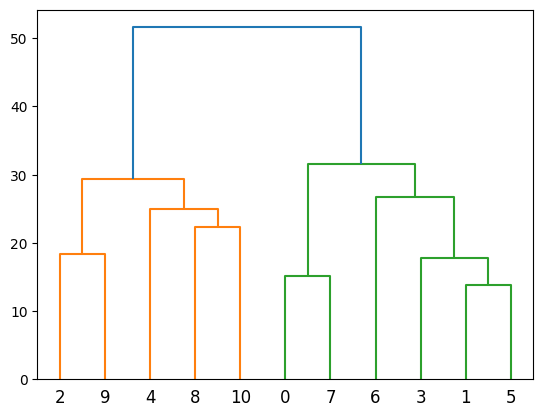

In [220]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering on the transpose of the data
Z = linkage(MD.T, 'ward')

# Create a dendrogram to determine the ordering of the segmentation variables
dend = dendrogram(Z)

MD_k4=MD_km28["4"]

# Extract the ordering of the segmentation variables from the dendrogram
order = dend['leaves']

# Create a bar chart that shows the segment profiles for each component




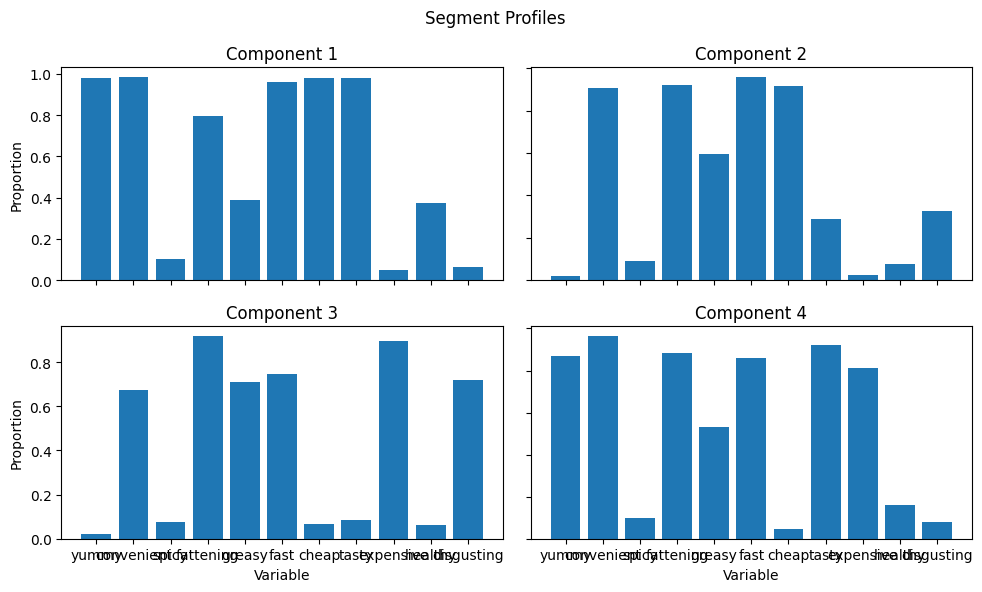

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the KMeans object with n_clusters=4
kmeans = MD_km28['4']

# Get the cluster labels for each row in MD
labels = kmeans.labels_

# Group the data in MD by cluster and calculate the mean value for each column in each cluster
MD_mean = MD.groupby(labels).mean()

# Create four bar charts that show the segment profiles for each component
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].bar(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].bar(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].bar(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].bar(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Add some text for labels and custom x-axis tick labels
for ax in axs.flat:
    ax.set(xlabel='Variable', ylabel='Proportion')
    ax.set_xticks(range(MD_mean.shape[1]))
    ax.set_xticklabels(MD.columns)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()


C:\Users\Mohammed Roshan\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


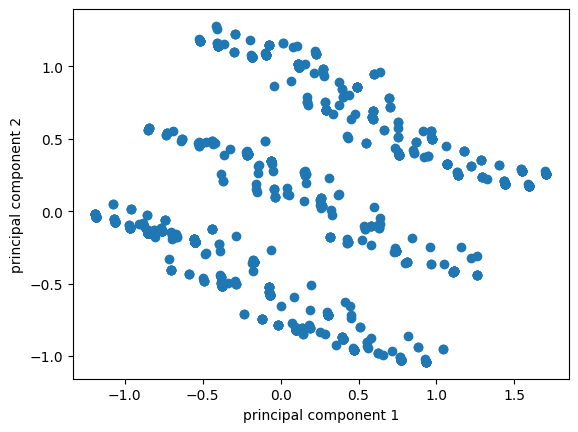

In [199]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit the KMeans model to your data
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

# Transform your data using PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()



In [267]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
df_eleven = data.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(data['cluster_num'],data['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

ValueError: could not convert string to float: 'No'

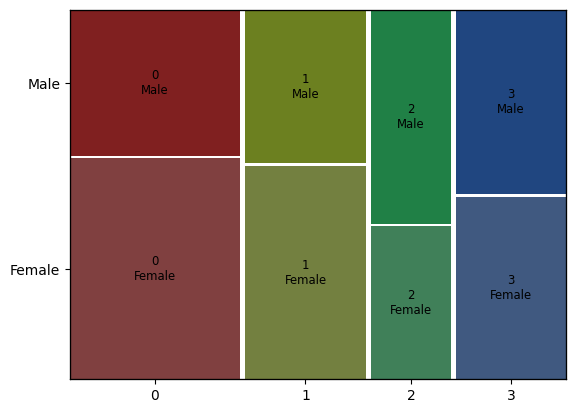

In [263]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Extract the segment membership for each consumer for the four-segment solution
k4 = MD_k4.labels_

# Cross-tabulate segment membership and the Gender variable
ct = pd.crosstab(k4, data['Gender'])
ct
# # Generate the mosaic plot with cells colors indicating the deviation of the observed frequencies in each cell from the expected frequency if variables are not associated
mosaic(ct.stack(),gap=0.01)
# plt.legend()
plt.show()